Task 5: Binary Classification with Logistic Regression  
● Load the Breast Cancer Dataset from sklearn.datasets. <br>
● Train a logistic regression model to predict whether a tumor is benign or malignant. <br>
● Evaluate using: <br>
  ○ Accuracy <br>
  ○ Confusion Matrix <br>
  ○ Precision, Recall, F1-score <br>
  ○ ROC-AUC curve


Accuracy 0.956140350877193

Confusion matrix given here:
 [[39  4]
 [ 1 70]]

Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC Score: 0.9977071732721913


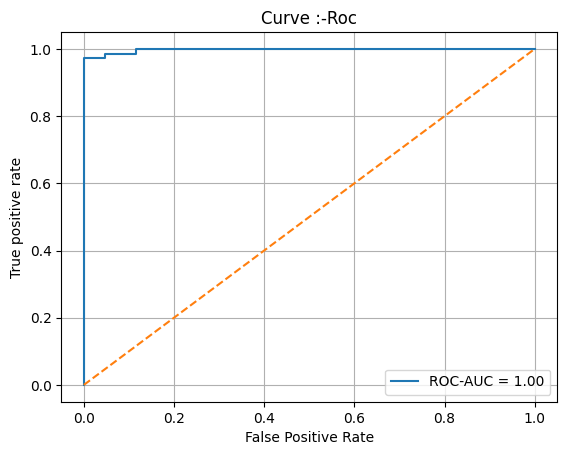

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
xdata = data.data
ydata = data.target

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

acc = accuracy_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
report = classification_report(ytest, ypred)
rocauc = roc_auc_score(ytest, model.predict_proba(xtest)[:, 1])

print("Accuracy", acc)
print("\nConfusion matrix given here:\n", cm)
print("\nReport:\n", report)
print("ROC Score:", rocauc)

fpr, tpr, _ = roc_curve(ytest, model.predict_proba(xtest)[:, 1])
plt.plot(fpr, tpr, label=f"ROC-AUC = {rocauc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive rate")
plt.title("Curve :-Roc")
plt.legend()
plt.grid()
plt.show()


Task 6: Threshold Tuning and Probability Interpretation  
● Predict the probability of the positive class. <br>
● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change. <br>
● Plot the ROC curve and mark optimal threshold.



Threshold: 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104

Threshold: 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104

Threshold: 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.9790209790209791


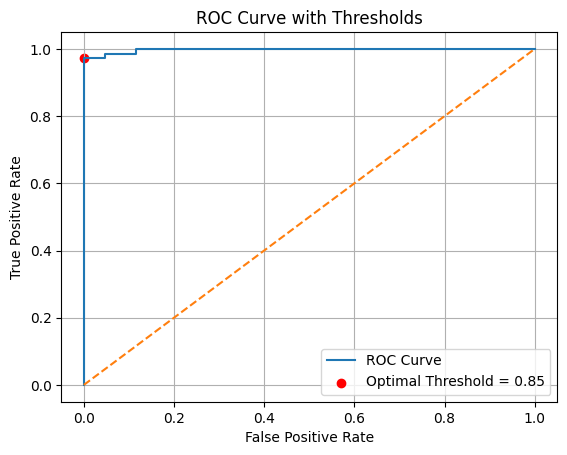

In [8]:
import numpy as np
from sklearn.metrics import f1_score

probs = model.predict_proba(xtest)[:, 1]
threshold = [0.3, 0.5, 0.7]

for t in threshold:
    ypredthresh = (probs >= t).astype(int)
    cmthresh = confusion_matrix(ytest, ypredthresh)
    f1 = f1_score(ytest, ypredthresh)
    print(f"\nThreshold: {t}")
    print("Confusion Matrix:\n", cmthresh)
    print("F1 Score:", f1)

fpr, tpr, thresh = roc_curve(ytest, probs)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Thresholds")

optimal_idx = np.argmax(tpr - fpr)
optimal_thresh = thresh[optimal_idx]

plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Optimal Threshold = {optimal_thresh:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.legend()
plt.grid()
plt.show()


Task 7: Multiclass Classification (Optional)  
● Use the Iris Dataset to perform multiclass logistic regression. <br>
● Use one-vs-rest or multinomial strategy. <br>
● Evaluate model accuracy and classification report.


In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

iris = load_iris()
xiris = iris.data
yiris = iris.target
xtrain, xtest, ytrain, ytest = train_test_split(xiris, yiris, test_size=0.2, random_state=42)

modelmulti = LogisticRegression(multi_class='ovr', max_iter=200)
modelmulti.fit(xtrain, ytrain)
ypred = modelmulti.predict(xtest)

acc = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)

print("Accuracy:-", acc)
print("\nClassification Report:-\n", report)


Accuracy:- 0.9666666666666667

Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
